# Coding sample by Kevin Palmer-Wilson.
This notebook demonstrates the imoplementation of a toy hydrogen production cost model, and its optimization using pyswarms.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from hydrogen_cost_model import hydrogen_supply_cost

In [2]:
# Load the electricity price data
grid_price = pd.read_csv('example_power_prices_germany.csv')
# slice out the year of 2022
grid_price = grid_price[(grid_price["Datetime (UTC)"] < "2023-01-01 00:00:00") & (grid_price["Datetime (UTC)"] >= "2022-01-01 00:00:00")]

USD_PER_EUR = 1.3
KWH_PER_MWH = 1000
grid_price_hourly__usd_per_kwh = grid_price["Price (EUR/MWhe)"] * (USD_PER_EUR / KWH_PER_MWH)

# remove negative prices and convert to numpy array
grid_price_hourly__usd_per_kwh = np.maximum(0, grid_price_hourly__usd_per_kwh.to_numpy()).reshape(-1,)

assert len(grid_price_hourly__usd_per_kwh) == 8760

In [3]:
# Define the hydrogen demand profile (in kg/h)

num_hours = 8760  # number of hours in a year
x = np.linspace(0, np.pi, num_hours)  # generate evenly spaced values over the first half of a sine wave period

# Create the sine wave
half_sine_wave = np.sin(x).reshape(-1,)  # reshape to (8760,)


# Have the demand curve range from 10 kg/h in the winter to 12 kg/h in the summer
h2_demand__kg_per_hour = np.ones((8760,)) * (half_sine_wave * 2) + 10


(0.0, 12.09999996623086)

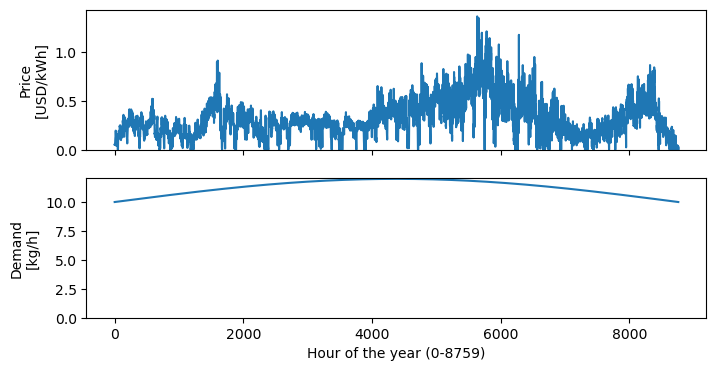

In [4]:
# Plot the electricity prices, and the demand profile
fig, ax = plt.subplots(2, figsize=(8,4), sharex=True)

ax[0].plot(grid_price_hourly__usd_per_kwh, label="Electricity price")
ax[0].set_ylabel("Price\n[USD/kWh]")

ax[1].plot(h2_demand__kg_per_hour, label="Hydrogen demand")
ax[1].set_xlabel("Hour of the year (0-8759)")
ax[1].set_ylabel("Demand\n[kg/h]")

# Begin the y axis at zero
ax[0].set_ylim(bottom = 0)
ax[1].set_ylim(bottom = 0)


In [5]:
# Run the hydrogen production model

lcoh, h2_absolute_storage_level__kg = hydrogen_supply_cost(
        h2_demand__kg_per_hour = h2_demand__kg_per_hour,
        electricity_price__usd_per_kwh = grid_price_hourly__usd_per_kwh,
        electrolyzer_size__kw = 1000,
        electrolyzer_capacity_factor__fraction = np.ones(shape=(8760,))
    )

print("LCOH:", lcoh)

LCOH: 28.225852758680226


Text(0, 0.5, 'Storage level\n[kg]')

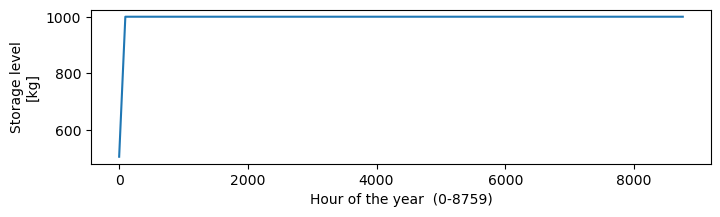

In [6]:
#  Plot the hydrogen storage level
fig, ax = plt.subplots(1, figsize=(8,2))
ax.plot(h2_absolute_storage_level__kg, label="Hydrogen storage")
ax.set_xlabel("Hour of the year  (0-8759)")
ax.set_ylabel("Storage level\n[kg]")
